In [26]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
visa_df = pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Re-cap**

**Outlier**

In [8]:
wage_data = visa_df['prevailing_wage']
#Step:1
quartile_1=np.percentile(visa_df['prevailing_wage'],25)
quartile_2=np.percentile(visa_df['prevailing_wage'],50)
quartile_3=np.percentile(visa_df['prevailing_wage'],75)
#Step:2
IQR = quartile_3 - quartile_1
#Step:3
lower_bound = quartile_1 - (1.5 * IQR)
upper_bound = quartile_3 + (1.5 * IQR)
#Step:4
con_1 = wage_data < lower_bound # True or false
con_2 = wage_data > upper_bound # True or false
con_3 = con_1 | con_2 #We are comparing True or false
#Step:5
outliers_data_df = visa_df[con_3]
outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


**Non Outliers**

In [10]:
wage_data = visa_df['prevailing_wage']
#Step:1
quartile_1=np.percentile(visa_df['prevailing_wage'],25)
quartile_2=np.percentile(visa_df['prevailing_wage'],50)
quartile_3=np.percentile(visa_df['prevailing_wage'],75)
#Step:2
IQR = quartile_3 - quartile_1
#Step:3
lower_bound = quartile_1 - (1.5 * IQR)
upper_bound = quartile_3 + (1.5 * IQR)
#Step:4
con_1 = wage_data > lower_bound # True or false
con_2 = wage_data < upper_bound # True or false
con_3 = con_1 & con_2 #We are comparing True or false
#Step:5
non_outliers_data_df = visa_df[con_3]
non_outliers_data_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


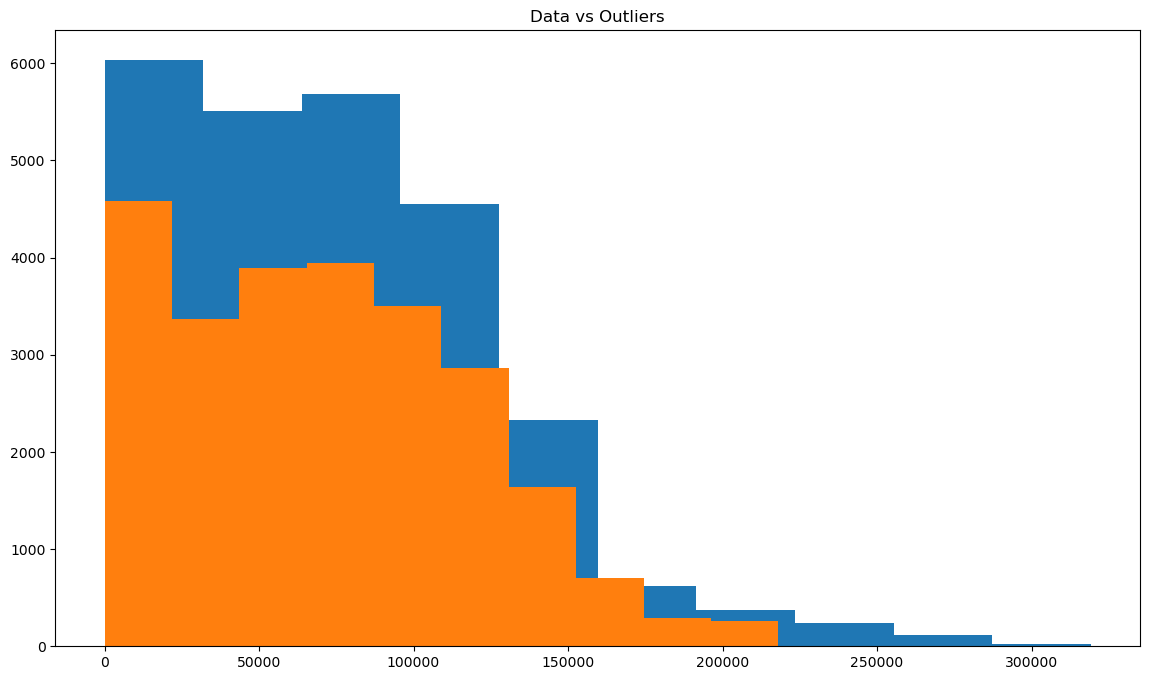

In [30]:
wage_data_non_outliers = non_outliers_data_df['prevailing_wage']
wage_data = visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.title('Data vs Outliers')
plt.show()

**How to deal with Outliers**
1. We can drop the outliers
    - Dropping the outliers is an easy task, but ***not recommended***
    - If you drop the outliers we are dropping the rows
    - Which means we are dropping the other columns values also
    - Maybe some important information we might lose it from other column values
    - But in the industry, if the outlier percentage is less than 2% of the total data, we can drop
    - The number of outlier in pwage is 427
    - The number of total observations is 25480
    - The outlier percentage is 1.67 for **prevailing wage** column which is less than 2%
2. Fill with **Median Value**
    - we already know that the outliers does not affect by median
    - so it is best practice to fill the outliers with ***Median***
3. Capping or flooring
    - Instead of filling with the median
    - we can fill with certain values
    - the outliers that are less than lower bound fill with lower bound values
    - the outliers that are more than upper bound fill with upper bound values
    - but we need to ***follow the 2 step for best result***
4. **Isolation Forest**
    - Is ML model used to find the outliers and anomalies

#### Fill with **Median Value**

In [50]:
list_1 = []
for value in wage_data:
    if value < lower_bound or value > upper_bound:
        median = wage_data.median()
        list_1.append(median)
    else:
        list_1.append(value)

In [54]:
len(list_1)

25480

In [39]:
median_visa = np.median(visa_df['prevailing_wage'])
median_visa

70308.20999999999

**np.where**
- In numpy we have a method called where
- it takes three arguments
    1. Condition
    2. value if the condition is True
    3. Value if the condition is False
- It is applicable only for Binary means if and else

In [69]:
dict1 = {'Sub':['DS','DE','CS'],
        'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


-  Replace marks with 1 which is greater than 100 

In [75]:
list_2 =[]
for i in df['marks']:
    if i>100:
        list_2.append(1)
    else:
        list_2.append(i)
list_2

[100, 1, 1]

In [73]:
con = df['marks']>100
l = np.where(con,1,df['marks'])
df['marks'] = l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


**Implementing for outliers with median**

In [78]:
con_1_rep_med = wage_data < lower_bound
con_2_rep_med = wage_data > upper_bound
con_3_rep_med = con_1_rep_med | con_2_rep_med
wage_median = wage_data.median()
list_visa_rep_med = np.where(con_3_rep_med,wage_median,wage_data)
list_visa_rep_med

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [82]:
visa_df['prevailing_wage_updated'] = list_visa_rep_med

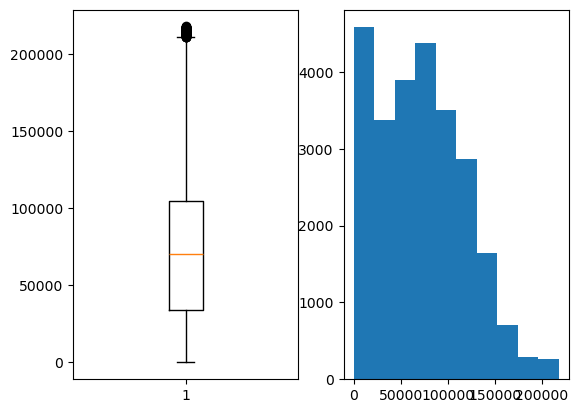

In [86]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_updated'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_updated'])
plt.show()